# Destructive SWAP test
review : [The SWAP test and the Hong-Ou-Mandel eﬀect are equivalent](https://arxiv.org/abs/1303.6814)

SWAP test is one of the method to solve the fidelity measurement task.
On the paper given above, they construct a method to simplify the swap test's
circuit with the intuition from Hong-Ou-Mandel's success probability.
They first get the intuition from HOM experiment and construct the circuit
based on the logical fact of CCNOT gate.
In this note, we are going to review the destructive SWAP test with pennylane library.

In [8]:
import pennylane as qml
import numpy as np

From the fact that CCNOT gate's statistics is same with adding X gate to 0qubit after measuring $x_1\cdot x_2=1$ while it is at the end of the circuit measureing z-basis with $\ket{target}=\ket0$, we could construct swap gate to the circuit below.

In [22]:
@qml.qnode(device=qml.device("default.qubit", wires=2))
def destructiveSWAPTest(psi, phi):
    qml.StatePrep(phi, wires=0)
    qml.StatePrep(psi, wires=1)
    qml.Barrier()
    qml.CNOT(wires=[0,1])
    qml.Hadamard(0)
    qml.Barrier()
    return qml.probs()

def getFidelity_DestructiveSWAP(psi, phi):
    successProb = (destructiveSWAPTest(psi,phi)[0:3]).sum()
    return 2*successProb-1

To compare with destructive one, define SWAP test circuit as below.

In [23]:
@qml.qnode(device=qml.device("default.qubit", wires=3))
def SWAPTest(psi,phi):
    qml.StatePrep(phi, wires=1)
    qml.StatePrep(psi, wires=2)
    qml.Barrier()
    qml.Hadamard(0)
    qml.CSWAP(wires=[0,1,2])
    qml.Hadamard(0)
    qml.Barrier()
    return qml.probs(0)

def getFidelity_SWAP(psi, phi):
    successProb = SWAPTest(psi,phi)[0]
    return 2*successProb-1

Generate random $\ket\psi, \ket\phi$ and see the fidelity numerically.

In [24]:
ket = lambda r : np.array([np.cos(r[0]), np.exp(1j*r[1])*np.sin(r[0])])
psi = ket(np.random.rand(2))
phi = ket(np.random.rand(2))

print(f"fidelity : {abs(psi.T.conj()@phi)**2}")

fidelity : 0.9020490011792998


Circuit of destructive SWAP test is given as below.

(<Figure size 800x300 with 1 Axes>, <Axes: >)

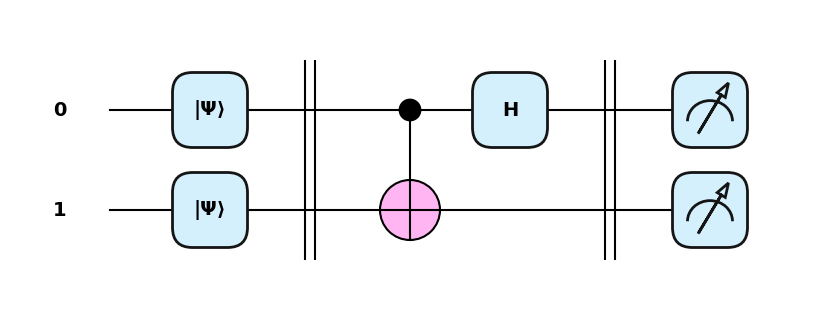

In [25]:
qml.draw_mpl(destructiveSWAPTest, style="pennylane")(psi,phi)

(<Figure size 900x400 with 1 Axes>, <Axes: >)

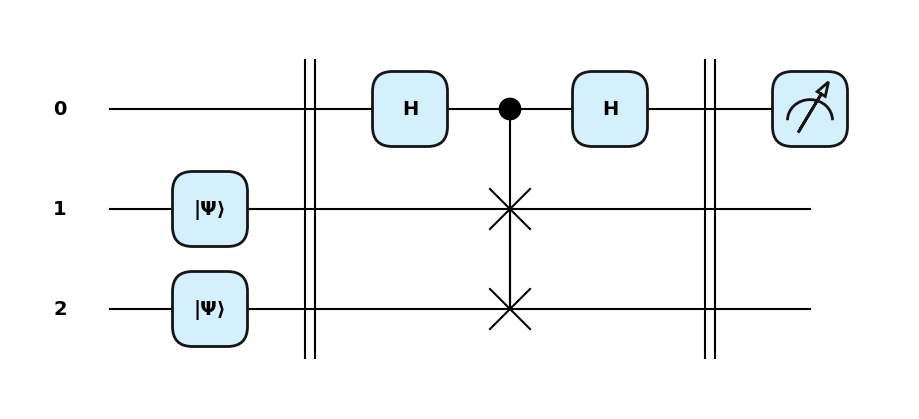

In [26]:
qml.draw_mpl(SWAPTest, style="pennylane")(psi,phi)

In [7]:
print(f"destructive swap test measured fidelity : {getFidelity_DestructiveSWAP(psi, phi)}")
print(f"swap test measured fidelity : {getFidelity_SWAP(psi,phi)}")

destructive swap test measured fidelity : 0.9727007329457984
swap test measured fidelity : 0.9727007329457984


In [30]:
qml.math.fidelity([[1, 0], [0, 0]],[[1, 0], [0, 0]])

1.0

On this note, we could get the intuition that some complex quantum circuit could have equivalent classical post processing of results of realtively simple quantum circuit's measurement.